In [15]:
import time # to time the execution
import numpy as np
import matplotlib.pyplot as plt

In [28]:
def load_data(data_path):
    return np.loadtxt(data_path, delimiter=',')


In [17]:
def initialise_centers(data, K, init_centers=None):
    if init_centers is None:
        idx = np.random.choice(data.shape[0], K, replace=False)
        return data[idx]
    return init_centers


In [18]:
def initialise_labels(data):
    return np.ones(data.shape[0], dtype=int)


In [19]:
def calculate_distances(data, centers):
    diff = data[:, np.newaxis, :] - centers[np.newaxis, :, :]
    return np.sqrt(np.sum(diff ** 2, axis=2))


In [20]:
def update_labels(distances):
    return np.argmin(distances, axis=1)


In [21]:
def update_centers(data, labels, K):
    return np.array([
        data[labels == k].mean(axis=0) for k in range(K)
    ])


In [22]:
def check_termination(labels1, labels2):
    return np.array_equal(labels1, labels2)


In [23]:
def visualise(data_path, labels, centers):
    data = load_data(data_path)
    plt.scatter(data[:, 0], data[:, 1], c=labels)
    plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='x')
    plt.title('K-means clustering')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.savefig('kmeans.png')
    return plt


In [24]:
### DON'T CHANGE ANYTHING IN THE FOLLOWING FUNCTION
def kmeans(data_path:str, K:int, init_centers):
    '''
    Input :
        data (type str): path to the file containing the data
        K (type int): number of clusters
        init_centers (type numpy.ndarray): initial centers. shape = (K, 2) or None
    Output :
        centers (type numpy.ndarray): final centers. shape = (K, 2)
        labels (type numpy.ndarray): label of each data point. shape = (N,)
        time (type float): time taken by the algorithm to converge in seconds
    N is the number of data points each of shape (2,)
    '''
    data = load_data(data_path)
    centers = initialise_centers(data, K, init_centers)
    labels = initialise_labels(data)

    start_time = time.time() # Time stamp

    while True:
        distances = calculate_distances(data, centers)
        labels_new = update_labels(distances)
        centers = update_centers(data, labels_new, K)
        if check_termination(labels, labels_new): break
        else: labels = labels_new

    end_time = time.time() # Time stamp after the algorithm ends
    return centers, labels, end_time - start_time

Time taken for the algorithm to converge: 0.0025033950805664062


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.12/dist-packages/matplotlib/pyplot.py'>

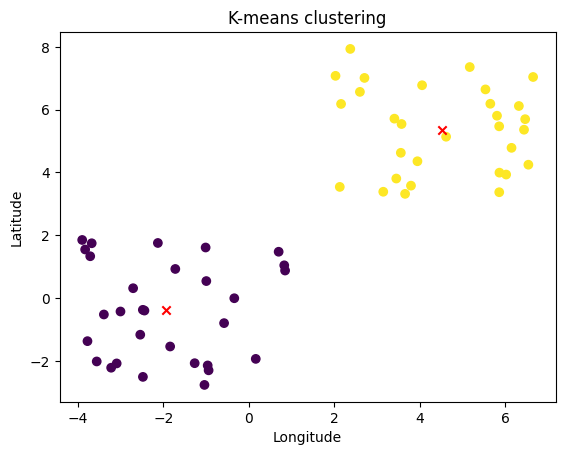

In [29]:
### After you have completed the above functions, run the following code to generate the plot
data_path = 'spice_locations.txt'
K, init_centers = 2, None
centers, labels, time_taken = kmeans(data_path, K, init_centers)
print('Time taken for the algorithm to converge:', time_taken)
visualise(data_path, labels, centers)